In [1402]:
from collections import defaultdict, Counter
from itertools import combinations, permutations, product
import pandas as pd
import re
from re import findall
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import ceil, sqrt
from scipy.ndimage import generic_filter
from skimage.segmentation import flood
from IPython.core.display import display, HTML
import big_o
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', 50)

In [7]:
def open_source(day):
    with open('source/{}.txt'.format(day), 'r') as f:
        lista = f.readlines()
    lista = [x.strip('\n') for x in lista]
    return lista

# Day 1

## Feladat 1

In [8]:
with open('source/day1.txt', 'r') as f:
    lista = f.readlines()

In [9]:
lista = [int(x.strip('\n')) for x in lista]

In [10]:
def nagyobb(lista):
    elozo = lista[0]
    eredmeny = 0
    for x in lista[1:]:
        if x > elozo:
            eredmeny += 1
        elozo = x
    return eredmeny

In [11]:
nagyobb(lista)

1390

## Feladat 2

In [12]:
def chunks(lista, chunk_size, overlap):
    for i in range(0, len(lista), overlap):
        if len(lista[i:i+chunk_size]) == 3:
            yield lista[i:i+chunk_size]

lista_3as = []            
for x in chunks(lista, 3, 1):
    lista_3as.append(sum(x))

In [13]:
nagyobb(lista_3as)

1457

# Day 2

## Feladat 1

In [14]:
final horizontal * final depth

SyntaxError: invalid syntax (Temp/ipykernel_32836/2119270184.py, line 1)

In [ ]:
with open('source/day2.txt', 'r') as f:
    lista = f.readlines()
lista = [x.strip('\n') for x in lista]

In [ ]:
horizontal_pos = 0
depth = 0
for x in lista:
    if 'forward' in x:
        horizontal_pos += int(x.split(' ')[-1])
    elif 'up' in x:
        depth -= int(x.split(' ')[-1])
    elif 'down' in x:
        depth += int(x.split(' ')[-1])

In [ ]:
horizontal_pos * depth

## Feladat 2

In [ ]:
horizontal_pos = 0
aim = 0
depth = 0
for x in lista:
    if 'up' in x:
        aim -= int(x.split(' ')[-1])
    elif 'down' in x:
        aim += int(x.split(' ')[-1])
    if 'forward' in x:
        horizontal_pos += int(x.split(' ')[-1])
        depth += int(x.split(' ')[-1]) * aim

In [ ]:
horizontal_pos * depth

# Day 3

## Feladat 1

In [ ]:
def open_source(day):
    with open('source/{}.txt'.format(day), 'r') as f:
        lista = f.readlines()
    lista = [x.strip('\n') for x in lista]
    return lista

In [ ]:
lista = open_source('day3')

In [ ]:
dd = defaultdict(list)

In [ ]:
#def count_binary()
dd = defaultdict(list)
gamma = ''
epsilon = ''
for i in range(len(lista[0])):
    for j in lista:
        dd[i].append(j[i])
    gamma += max(set(dd[i]), key=dd[i].count)
    epsilon += min(set(dd[i]), key=dd[i].count)    

In [ ]:
int(gamma, 2) * int(epsilon, 2)

## Feladat 2

In [ ]:
dd = defaultdict(list)
gamma = ''
epsilon = ''
for i in range(len(lista[0])):
    for j in lista:
        dd[i].append(j[i])

In [ ]:
pandas_lista = [list(x) for x in lista]

In [ ]:
df = pd.DataFrame(pandas_lista)

In [ ]:
def melyik_o(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    else:
        return '1'
    
def melyik_co(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    else:
        return '0'

In [ ]:
def melyik_o(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    else:
        return '1'

oxigen = df.copy()
for col in oxigen.columns:
    marado = melyik_o(oxigen, col)
    oxigen = oxigen.loc[oxigen[col] == marado]
    if len(oxigen) == 1:
        break

In [ ]:
co2 = df.copy()
for col in co2.columns:
    marado = melyik_co(co2, col)
    co2 = co2.loc[co2[col] == marado]
    if len(co2) == 1:
        break

In [ ]:
int(co2.apply(''.join, axis=1).iloc[0], 2) * int(oxigen.apply(''.join, axis=1).iloc[0], 2)

# Day 4

## Feladat 1

In [ ]:
with open('source/day4.txt', 'r') as f:
    lista = f.readlines()

In [ ]:
boards = [list(filter(None, x.strip('\n').split(' '))) for x in lista[2:]]

In [ ]:
def vert_match(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    if True in (a[0] == a).all(0):
        return True
    else:
        return False
    
def hori_match(df):
    if len(df[df.apply(lambda x: min(x) == max(x), 1)]) > 0:
        return True
    else:
        return False

list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
result = ''
result_df = ''
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if vert_match(df) or hori_match(df):
            result_df = df
            result = result_df.replace('x', 0).astype(int).sum().sum() * int(num)
            break
    else:
        continue
    break

In [ ]:
result

## Feladat 2

In [ ]:
list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
result = ''
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if (vert_match(df) or hori_match(df)) and (len(list_of_boards) > 1):
            print("removed df: {} for num: {}".format(j, num))
            list_of_boards.pop(j)
        if num == '41':
            break
    else:
        continue
    break



In [ ]:
list_of_boards[0].replace('41', 'x')

In [ ]:
list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
total_df = len(list_of_boards)
remaining_df = 0
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if vert_match(df) or hori_match(df):
            remanining_df += 1
            list
            break
    else:
        continue
    break

In [ ]:
list_of_boards

In [ ]:
list_of_boards = []

for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
nyolc = [list_of_boards[8]]   
to_remove = []
for i, num in enumerate(draw):
    for j, df in enumerate(nyolc):
        df.replace(num, 'x', inplace=True)
        if (vert_match(df) or hori_match(df)):
            break
    else:
        continue
    break



In [ ]:

nyolc[0].replace('x', 0).astype(int).sum().sum() * int(num)


In [ ]:
min(to_remove, key=to_remove.count)

In [ ]:
[list_of_boards[8]]

# Day 5

## Feladat 1

In [ ]:
with open('source/day5.txt', 'r') as f:
    lista = f.readlines()

In [15]:
floor = [re.split(' -> |,', x.strip('\n')) for x in lista]
floor = [[int(y) for y in x] for x in floor]

AttributeError: 'int' object has no attribute 'strip'

In [ ]:
rmap = np.zeros((1000,1000), dtype=int)
df = pd.DataFrame(rmap)
df.index += 1
df.columns = [x+1 for x in df.columns]
# első az index

In [ ]:
def add(e, m):
    df.loc[e, m] += 1

for l in floor:
    if l[0] == l[2]:
        # vertical le és fel
        df.loc[l[0], l[1]:l[3]] += 1
        df.loc[l[0], l[3]:l[1]] += 1
    elif l[1] == l[3]:
        # horizontal jobbra és balra
        df.loc[l[0]:l[2], l[1]] += 1
        df.loc[l[2]:l[0], l[1]] += 1

In [ ]:
df[df >= 2].count().sum()

## Feladat 2

In [ ]:
def add(e, m):
    df.loc[e, m] += 1

for l in floor:
    if l[0] == l[2]:
        # vertical le és fel
        df.loc[l[0], l[1]:l[3]] += 1
        df.loc[l[0], l[3]:l[1]] += 1
    elif l[1] == l[3]:
        # horizontal jobbra és balra
        df.loc[l[0]:l[2], l[1]] += 1
        df.loc[l[2]:l[0], l[1]] += 1
    elif (l[0] < l[2]) and (l[1] < l[3]):
        # d jobbra le
        e = np.arange(l[0], l[2]+1, 1)
        m = np.arange(l[1], l[3]+1, 1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] > l[2]) and (l[1] > l[3]):
        # d balra fel
        e = np.arange(l[0], l[2]-1, -1)
        m = np.arange(l[1], l[3]-1, -1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] > l[2]) and (l[1] < l[3]):
        # d jobbra fel
        e = np.arange(l[0], l[2]-1, -1)
        m = np.arange(l[1], l[3]+1, 1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] < l[2]) and (l[1] > l[3]):
        # d balra le
        e = np.arange(l[0], l[2]+1, 1)
        m = np.arange(l[1], l[3]-1, -1)
        [add(x[0], x[1]) for x in zip(e, m)]

In [ ]:
df[df >= 2].count().sum()

# Day 6

## Feladat 1-2

In [ ]:
lista = open_source('day6')

In [ ]:
start = lista[0].split(',')
start = [int(x) for x in start]
start = Counter(reversed(sorted(start)))
start

In [ ]:
def breeding(current, r):
    if r == 0:
        return current
    else:
        next_round = {}
        for k, v in current.items():
            if k != 0:
                next_round[k-1] = next_round.get(k-1, 0) + v
            elif k == 0:
                next_round[6] = next_round.get(6, 0) + v
                next_round[8] = next_round.get(8, 0) + v
        return breeding(next_round, r-1)

In [ ]:
asd = start.copy()
result = breeding(asd, 256)

In [ ]:
sum(result.values())

# Day 7

## Feladat 1-2

In [16]:
lista = open_source('day7')
lista = lista[0].split(',')
lista = [int(x) for x in lista]

In [17]:
result = 10**100
for i in range(0, max(lista)):
    summ = 0
    for l in lista:
        diff = np.abs(l - i)
        diff = diff*(diff+1)/2
        summ += diff
    if summ < result:
        result = summ

In [18]:
result

96864235.0

# Day 8

## Feladat 1

In [19]:
lista = open_source('day8')

In [20]:
vege = [x.split(' | ')[-1].split(' ') for x in lista]
vege = [item for sublist in vege for item in sublist]
vege = [len(x) for x in vege if len(x) == 2 or len(x) == 3 or len(x) == 4 or len(x) == 7]

In [21]:
len(vege)

272

## Feladat 2

In [22]:
def get_dict(row):
    row_set = [set(x) for x in row]
    rdict = {}
    rdict['1'] = [x for x in row_set if len(x) == 2][0]
    rdict['4'] = [x for x in row_set if len(x) == 4][0]
    rdict['7'] = [x for x in row_set if len(x) == 3][0]
    rdict['8'] = [x for x in row_set if len(x) == 7][0]
    rdict['9'] = [x for x in row_set if rdict['4'].issubset(x) and len(x) == 6][0]
    rdict['3'] = [x for x in row_set if rdict['7'].issubset(x) and len(x) == 5][0]
    rdict['6'] = [x for x in row_set if not rdict['1'].issubset(x) and len(x) == 6][0]
    rdict['5'] = [x for x in row_set if x.issubset(rdict['6']) and len(x) == 5][0]
    rdict['0'] = [x for x in row_set if not rdict['5'].issubset(x) and len(x) == 6][0]
    rdict['2'] = [x for x in row_set if not x.issubset(rdict['5']) and not x.issubset(rdict['3']) and len(x) == 5][0]
    resdict = {}
    [resdict.update({''.join(sorted(list(v))): k}) for k, v in rdict.items()]
    return resdict

result = 0
for ele in lista:
    first = [''.join(sorted(x)) for x in ele.split(' | ')[0].split(' ')]
    second = [''.join(sorted(x)) for x in ele.split(' | ')[1].split(' ')]
    string_to_num = get_dict(first)
    result += int(''.join([string_to_num[x] for x in second]))
result

1007675

# Day 9

## Feladat 1

In [23]:
lista = open_source('day9')

In [24]:
lista = [[int(y) for y in x] for x in lista]

In [25]:
bordering = [[j, k] for j in range(-1, 2) for k in range(-1, 2)]
bordering.remove([0, 0])
bordering

[[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]

In [26]:
def get_border_9(l, bordering, i, j):
    res_list = []
    for c in bordering:
        p = []
        p.append(i+c[0])
        p.append(j+c[1])
        if (len(p) == 2 and 
            p[0] < len(l) and 
            p[1] < len(l[0]) and 
            p[0] >= 0 and 
            p[1] >= 0):
            res_list.append(p)
    return res_list

In [27]:
result = 0
part_2 = np.zeros((len(lista), len(lista[0])))
for i in range(0, len(lista)):
    for j in range(0, len(lista[0])):
        if min([lista[x[0]][x[1]] for x in get_border_9(lista, bordering, i, j)]) > lista[i][j]:
            result += lista[i][j] + 1
            part_2[i,j] = 1
result

577

## Feladat 2

In [28]:
a = np.array(lista)

In [29]:
a[a < 9] = 1
basin_coords = np.nonzero(part_2)
sizes = []
for (x,y) in zip(*basin_coords):
    mask = flood(a, (x,y), tolerance=1, connectivity=1)
    sizes.append(mask.sum())

np.prod(sorted(sizes)[-3:])

1069200

# Day 10

## Feladat 1-2

In [30]:
lista = open_source('day10')

In [31]:
scoring_1 = {')': 3, ']': 57, '}': 1197, '>': 25137}
scoring_2 = {'(': 1, '[': 2, '{': 3, '<': 4}

In [32]:
result = 0
to_replace = ['<>', '()', '[]', '{}'] * 100
task_2 = []
for l in lista:
    for c in to_replace:
        l = l.replace(c, '')
    l_original = l
    for c in to_replace:
        l = l.replace(c[0], '')
    if len(l) == 0:
        task_2.append(l_original)
    else:
        result += scoring_1[l[0]]
result

339537

In [33]:
from statistics import median

result = []
for l in task_2:
    partial = 0
    res = l[len(l)::-1]
    for c in res:
        partial *= 5
        partial += scoring_2[c]
    result.append(partial)

median(result)

2412013412

# Day 11

## Feladat 1

In [190]:
lista = open_source('day11')
lista = [[int(x) for x in list(x)] for x in lista]

In [35]:
df = np.array(lista)
shape = np.array(lista).shape

def flash(i, j):
    if df[i,j] == 0 and flashed[i,j]:
        return

    df[i,j] += 1

    if df[i,j] > 9:        
        df[i,j] = 0
        flashed[i,j] = True
        for i, j in get_border(i,j):  
            flash(i, j)
            
def get_border(i, j):
    res_list = []
    for c in bordering:
        p = []
        p.append(i+c[0])
        p.append(j+c[1])
        if (len(p) == 2 and 
            p[0] < shape[0] and 
            p[1] < shape[1] and 
            p[0] >= 0 and 
            p[1] >= 0):
            res_list.append(p)
    return res_list

In [36]:
total_flash = 0

for r in range(0, 100):
    flashed = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):               
            flash(i, j)
    total_flash += np.count_nonzero(flashed)
    
total_flash

1608

## Feladat 2

In [37]:
all_flash = True
r = 0
df = np.array(lista)

while all_flash:
    flashed = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):               
            flash(i, j)
    r += 1
    if np.count_nonzero(flashed) == 100:
        all_flash = False
        result = r

result

214

# Day 12

## Feladat 1

In [187]:
lista = open_source('day12')

In [188]:
lista = [tuple(x.split('-')) for x in lista]

In [164]:
gf = nx.Graph()

In [165]:
gf.add_edges_from(lista)

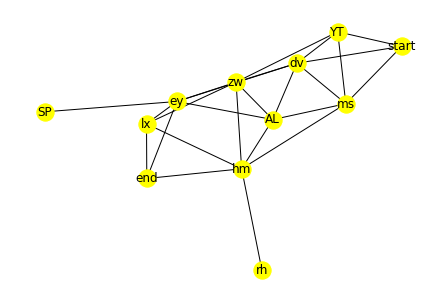

In [166]:
nx.draw(gf, with_labels = True, node_color='yellow')

In [167]:
len(list(nx.all_simple_paths(gf, 'start', 'end')))

961

In [169]:
def add_path(path):
    if path[-1] == 'end':
        yield path
    for x in gf.neighbors(path[-1]):
        if x == x.lower() and x in path:
            continue
        yield from add_path(path + [x])

In [170]:
len(list(add_path(['start'])))

3779

## Feladat 2

In [171]:
def add_path_double(path, double=False):
    if path[-1] == 'end':
        yield path
    for x in gf.neighbors(path[-1]):
        double_next = double
        if x == x.lower() and x in path:
            if double_next:
                continue
            else:
                if x in ['start', 'end']:
                    continue
                double_next = True
        yield from add_path_double(path + [x], double_next)

In [172]:
len(list(add_path_double(['start'])))

96988

# Day 13

## Feladat 1

In [48]:
lista = open_source('day13')

In [49]:
fold = [x for x in lista if 'fold' in x]
fold = [tuple([int(y) if 'x' not in y and 'y' not in y else y for y in x.split(' ')[-1].split('=')]) for x in fold]
coord = [tuple([int(x) for x in x.split(',')]) for x in lista if ',' in x]

In [50]:
x_max = max([x[0] for x in coord]) + 1
y_max = max([x[1] for x in coord]) + 2

In [51]:
arr = np.zeros((y_max, x_max))
for v in coord:
    arr[v[1], v[0]] = 1

In [52]:
fold1 = 655
first = arr[:,:fold1]
second = np.flip(arr[:,fold1+1:], axis=1)
res = first + second
np.count_nonzero(res)

785

## Feladat 2

In [53]:
for axis, value in fold:
    if axis == 'x':
        first = arr[:,:value]
        second = np.flip(arr[:,value+1:], axis=1)
    elif axis == 'y':
        first = arr[:value,:]
        second = np.flip(arr[value+1:,:], axis=0)
    res = first + second
    arr = res

In [54]:
df = pd.DataFrame(arr)
df[df > 0] = 1
df.replace(0, '')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.0,1.0,1.0,1.0,,,,1.0,1.0,,,1.0,1.0,,,1.0,,,1.0,,,,1.0,1.0,,,1.0,1.0,,,,1.0,1.0,,,1.0,,,1.0,
1,1.0,,,,,,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,
2,1.0,1.0,1.0,,,,,,1.0,,1.0,,,1.0,,1.0,1.0,1.0,1.0,,,,,1.0,,1.0,,,,,1.0,,,1.0,,1.0,1.0,1.0,1.0,
3,1.0,,,,,,,,1.0,,1.0,1.0,1.0,1.0,,1.0,,,1.0,,,,,1.0,,1.0,,1.0,1.0,,1.0,1.0,1.0,1.0,,1.0,,,1.0,
4,1.0,,,,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,
5,1.0,,,,,,1.0,1.0,,,1.0,,,1.0,,1.0,,,1.0,,,1.0,1.0,,,,1.0,1.0,1.0,,1.0,,,1.0,,1.0,,,1.0,


# Day 14

## Feladat 1-2

In [81]:
lista = open_source('day14')

In [96]:
template = lista[0]

In [97]:
template

'SCVHKHVSHPVCNBKBPVHV'

In [83]:
dd = defaultdict(str)
for x in lista[2:]:
    a = x.split(' -> ')
    dd[a[0]] = a[1]

In [58]:
def start_poly(template):
    template_start = Counter()
    for c in list(zip('A' + template, template))[1:]:
        template_start[''.join(c)] += 1
    return template_start

def poly(template, step):
    if step == 0:
        return template
    else:
        template_next = Counter()
        for k, v in template.items():
            template_next[k[0] + dd[k]] += v
            template_next[dd[k] + k[1]] += v
        step -= 1
        return poly(template_next, step)

def end_poly(res):
    res_final = Counter()
    for k, v in res.items():
        res_final[k[0]] += v
        res_final[k[1]] += v
    for k, v in res_final.items():
        res_final[k] = ceil(v/2)
    mx = max(res_final, key=res_final.get)
    mn = min(res_final, key=res_final.get)
    return res_final[mx] - res_final[mn]

In [99]:
template_start = start_poly(template)

In [60]:
res1 = poly(template_start, 10)
res1 = end_poly(res1)
res1

2712

In [61]:
res2 = poly(template_start, 40)
res2 = end_poly(res2)
res2

8336623059567

In [148]:
def complexity_14(x):
    template_start = start_poly(template)
    res = poly(template_start, x)
    res = end_poly(res)
    return res

In [149]:
complexity_14(10)

2712

In [196]:
best, others = big_o.big_o(complexity_14, big_o.datagen.n_, n_repeats=20, min_n=1, max_n=800)

In [197]:
print(best)

Linear: time = -0.014 + 0.0014*n (sec)


In [199]:
_ = [print(x) for x in list(others)]

Constant: time = 0.55 (sec)
Linear: time = -0.014 + 0.0014*n (sec)
Quadratic: time = 0.18 + 1.6E-06*n^2 (sec)
Cubic: time = 0.27 + 2E-09*n^3 (sec)
Polynomial: time = -7.1 * x^1.1 (sec)
Logarithmic: time = -0.22 + 0.14*log(n) (sec)
Linearithmic: time = 0.033 + 0.00021*n*log(n) (sec)
Exponential: time = -3.8 * 0.0061^n (sec)


# Day 15 (graph traversal: dijsktra and A* alogrithm)

## Feladat 1

In [981]:
lista = open_source('day15')

In [982]:
lista = [[int(x) for x in list(x)] for x in lista]
df = np.array(lista)

In [983]:
target = np.zeros(df.shape, dtype=int)
target[target == 0] = 99999

In [984]:
def lowest_risk(df, target):
    target[0][0] = 0

    for y in range(len(target)):
        for x in range(len(target[y])):
            if y == 0 and x == 0:
                continue

            temp = []
            if y + 1 < len(target):
                temp.append(target[y+1,x])
            if y - 1 >= 0:
                temp.append(target[y-1,x])
            if x + 1 < len(target[y]):
                temp.append(target[y,x+1])
            if x - 1 >= 0:
                temp.append(target[y,x-1])

            target[y][x] = min(temp) + df[y,x]
    
    return df, target

In [985]:
df_ = df.copy()
target_ = target.copy()
for x in range(30):
    df_, target_ = lowest_risk(df_, target_)
target_[-1,-1]

589

## Feladat 2

In [1058]:
df2 = df.copy()
res = []
for x in range(0, 5):
    temp = df2.copy()
    temp += x
    temp[temp > 9] -= 9
    res.append(temp)
df2 = np.concatenate(res, axis=1)
res = []
for x in range(0, 5):
    temp = df2.copy()
    temp += x
    temp[temp > 9] -= 9
    res.append(temp)
df2 = np.concatenate(res, axis=0)

In [1059]:
target2 = np.zeros(df2.shape, dtype=int)
target2[target2 == 0] = 99999

In [1060]:
df2_ = df2.copy()
target2_ = target2.copy()
for x in range(4):
    df2_, target2_ = lowest_risk(df2_, target2_)
target2_[-1,-1]

2885

## Miért nem jön ki????

In [1065]:
test = [x[:2] for x in lista[:17]]

In [1066]:
df = np.array(test)
res, res_df = lowest_risk_old(df)
print(res)

96


In [1067]:
df

array([[1, 2],
       [9, 2],
       [8, 3],
       [8, 5],
       [3, 6],
       [2, 7],
       [9, 9],
       [8, 4],
       [9, 9],
       [2, 9],
       [8, 2],
       [8, 1],
       [4, 6],
       [3, 9],
       [3, 5],
       [5, 8],
       [2, 9]])

In [1069]:
res_df

array([[ 0,  2],
       [ 9,  4],
       [17,  7],
       [25, 12],
       [28, 18],
       [30, 25],
       [39, 34],
       [47, 38],
       [56, 47],
       [58, 56],
       [66, 58],
       [74, 59],
       [78, 65],
       [81, 74],
       [84, 79],
       [89, 87],
       [91, 96]])

In [1063]:
def lowest_risk_old(df):
    zeros = np.zeros(df.shape, dtype=int)
 
    partial = 0
    for i, c in enumerate(df[0,:]):
        partial += c
        zeros[0,i] = partial - df[0,0]
    partial = 0
    for i, c in enumerate(df[:,0]):
        partial += c
        zeros[i,0] = partial - df[0,0]

    for i in range(1, df.shape[0]):
        for j in range(1, df.shape[1]):
            if zeros[i-1,j] <= zeros[i,j-1]:
                zeros[i,j] = zeros[i-1,j] + df[i,j]
            else:
                zeros[i,j] = zeros[i,j-1] + df[i,j]
                
    return zeros[df.shape[0]-1,df.shape[1]-1], zeros

# day 16

## Feladat 1-2

In [1220]:
lista = open_source('day16')

In [1221]:
hex_to_bin = {'0' : '0000', '1' : '0001', '2' : '0010', '3' : '0011', 
              '4' : '0100', '5' : '0101', '6' : '0110', '7' : '0111',
              '8' : '1000', '9' : '1001', 'A' : '1010', 'B' : '1011', 
              'C' : '1100', 'D' : '1101', 'E' : '1110', 'F' : '1111'}

In [1222]:
lista = ''.join([hex_to_bin.get(i, i) for i in list(lista[0])])

In [1254]:
versions = 0
def decode(l, x=0):
    global versions
    versions += int(l[x:x+3], 2)
    type_id = int(l[x+3:x+6], 2)
    if type_id == 4:
        return literal(l, x+6)
    else:
        return operator(l, x+6, type_id)
    
        
def literal(l, x):
    value = ''
    while True:
        value += l[x+1:x+5]
        if l[x] == '0':
            return int(value, 2), x+5
        x += 5
    
def operator(l, x, typ):
    total_length = total_packets = 0
    if l[x] == '0':
        total_length = int(l[x+1:x+16], 2)
        operands, x = by_length(l, x + 16, total_length)
    else:
        total_packets = int(l[x+1:x+12], 2)
        operands, x = by_count(l, x + 12, total_packets)
        
    if typ == 0:
        return sum(operands), x
    if typ == 1:
        return prod(operands), x
    if typ == 2:
        return min(operands), x
    if typ == 3:
        return max(operands), x
    if typ == 5:
        return int(operands[0] > operands[1]), x
    if typ == 6:
        return int(operands[0] < operands[1]), x
    if typ == 7:
        return int(operands[0] == operands[1]), x

def prod(l):
    m = 1
    for i in l: m *= i
    return m
    
def by_length(l, x, length):
    end = x + length
    values = []
    while x < end:
        value, x = decode(l, x)
        values.append(value)
    return values, x

def by_count(l, x, count):
    packets = 0
    values = []
    while packets < count:
        value, x = decode(l, x)
        values.append(value)
        packets += 1
    return values, x

In [1256]:
versions

854

In [1257]:
decode(lista)[0]

186189840660

# Day 17

## Feladat 1

In [1452]:
lista = open_source('day17')[0]

In [1453]:
lista

'target area: x=79..137, y=-176..-117'

In [1454]:
# x 12 és 137 között lesz
# y -176 és 175 között lesz

In [1455]:
x_list = list(range(12, 138))
y_list = list(range(-176, 176))
throw_options = [(x,y) for x in x_list for y in y_list]
len(throw_options)

44352

In [1450]:
high_total = 0
valid_total = 0
for x, y in throw_options:
    result = True
    vel_start = [x, y]
    pos = [0, 0]
    vel = list(vel_start)
    high_round = 0
    while result:
        if pos[1] > high_round: high_round = pos[1]
        pos[0] += vel[0]
        pos[1] += vel[1]
        if vel[0] > 0: vel[0] -= 1
        elif vel[0] < 0: vel[0] += + 1
        vel[1] -= 1
        if (79 <= pos[0] <= 137) and (-176 <= pos[1] <= -117):
            result = False
            valid_total += 1
            if high_round > high_total: high_total = high_round
        elif (pos[0] > 137) or (pos[1] < -176):
            result = False

In [1451]:
print(pos_high_total)
print(total_valid)

15400
5844


# Other random stuff

In [62]:
label = ('a', 'b')
row1 = ('asd   ', 2)
row2 = ('basd   ', 4)

In [63]:
dict(zip(label, tuple(zip(row1, row2))))

{'a': ('asd   ', 'basd   '), 'b': (2, 4)}

In [64]:
rows = [('basd   ', 1), ('asd    ', '2')]

In [65]:
df = pd.DataFrame(rows, columns=label)
df['a'].str.strip().to_list()

['basd', 'asd']

In [66]:
df['a'] = [x.strip() for x in df['a']]

In [1086]:
dd = defaultdict(list)

In [68]:
dicta = {}
for i, l in enumerate(label):
    for v in rows:
        if isinstance(v[i], str):
            dd[l].append(v[i].strip())
        else:
            dd[l].append(v[i])

In [1090]:
dd['name'] = ['a', 'b', 'c', 'd']
dd['date'] = [2018, 2019, 2020, 2021]

In [1268]:
rows = list(zip(['a', 'b', 'c', 'd'],[2018, 2019, 2020, 2021]) )
rows

[('a', 2018), ('b', 2019), ('c', 2020), ('d', 2021)]

In [1269]:
labels = ('name', 'date')

In [1272]:
df = pd.DataFrame(rows, columns=labels)

In [1275]:
for c, r in zip(df.columns, df.values):
    print(c, r)

name ['a' 2018]
date ['b' 2019]


In [1281]:
for r in range(len(df)):
    print(df.iloc[r])

name       a
date    2018
Name: 0, dtype: object
name       b
date    2019
Name: 1, dtype: object
name       c
date    2020
Name: 2, dtype: object
name       d
date    2021
Name: 3, dtype: object


In [1282]:
df.dtypes

name    object
date     int64
dtype: object

In [1287]:
[df[x].str.strip() for x in df.columns]

AttributeError: Can only use .str accessor with string values!

In [1290]:
tuple(df['name'])

('a', 'b', 'c', 'd')

In [1265]:
for r in range(len(next(iter(dd.values())))):
    print(r)

0
1
2
3


In [1259]:
for i in range(len(dd[label])):
    print(dd['name'][i], dd['date'][i])

a 2018
b 2019
c 2020
d 2021


In [1071]:
from datetime import datetime

In [1074]:
asd = datetime(2020, 12, 30)

In [1083]:
asd.strftime('%m/%d/%Y')

'12/30/2020'